In [1]:
"""
Exercise 6 (intermediate): Simulated Annealing

Your task is to modify the code to use simulated annealing. Use the cooling schedule for setting the temperature provided above, and modify the acceptance criterion from only accepting upward moves to accepting also downward moves with the proper probability. Remember that in this exercise the score in simulated annealing is the height of a given location on the mountain. Also note that you will need to handle T=0 case separately, since the acceptance probability for a worse score should be zero for zero temperature, but the formula used for the probability will result in division by zero.
"""
import math
import random
import numpy as np

n = 10000 # size of the problem: number of possible solutions x = 0, ..., n-1

# generate random mountains
def mountains(n):
    h = [0]*n
    for i in range(50):
        c = random.randint(20, n-20)
        w = random.randint(3, int(math.sqrt(n/5)))**2
        s = random.random()
        h[max(0, c-w):min(n, c+w)] = [h[i] + s*(w-abs(c-i)) for i in range(max(0, c-w), min(n, c+w))]

    # scale the height so that the lowest point is 0.0 and the highest peak is 1.0
    low = min(h)
    high = max(h)
    h = [y - low for y in h]
    h = [y / (high-low) for y in h]
    return h

h = mountains(n)

# start at a random place
x0 = random.randint(1, n-1)
x = x0

# keep climbing for 5000 steps
steps = 5000

def main(h, x):
    n = len(h)
    # the climbing starts here
    for step in range(steps):
        # let's try randomly moving (max. 1000 steps) left or right
        # making sure we don't fall off the edge of the world at 0 or n-1
        # the height at this point will be our candidate score, S_new
        # while the height at our current location will be S_old
        x_new = random.randint(max(0, x-1000), min(n-1, x+1000))

        if h[x_new] > h[x]:
            x = x_new           # the new position is higher, go there
        else:
            # this is our temperature to be used for simulated annealing
            # it starts large and decreases with each step. you don't have to change this
            T = 2*max(0, ((steps-step*1.2)/steps))**3
            if T != 0:
                probability = math.exp(-(h[x] - h[x_new]) / T)
                if random.random() < probability:
                    x = x_new
    return x

x = main(h, x0)
print("ended up at %d, highest point is %d" % (x, np.argmax(h)))

ended up at 2283, highest point is 2283


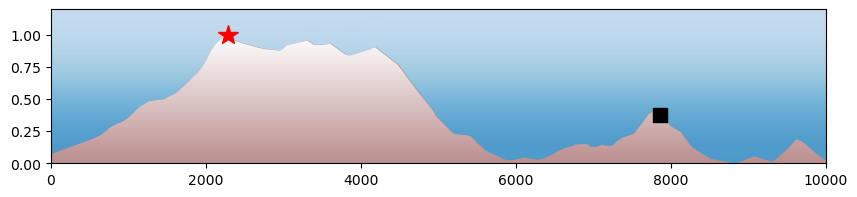

In [2]:
"""Plot, code from https://gist.github.com/AayushKucheria/00912c1fe1d60ae01052f0c905c606e2"""
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon

def gradient_fill(x, y, fill_color=None, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 1.0 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True, zorder=-100)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    return line, im

def plot_exercise6_intermediate():
    xx = np.array(list(range(n)))
    yy = np.array(h)
    plt.figure(figsize=(10,2))
    plt.gca().set_ylim(0, 1.2)
    plt.gca().set_xlim(0, n)
    plotlim = plt.gca().get_xlim() + plt.gca().get_ylim()
    cmap = mpl.cm.Blues(np.linspace(.2,.6,100))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
    plt.imshow([[0,0],[1,1]], cmap=cmap, interpolation='bicubic', extent=plotlim, zorder=-200)
    plt.grid(False)
    plt.fill_between(xx, 0, yy, color='rosybrown', zorder=-150)
    gradient_fill(xx, yy, 'white', plt.gca(), color='None')
    plt.plot([x0], [h[x0]], color='k', marker='s', markersize=10, zorder=50)
    plt.plot([x], [h[x]], color='r', marker='*', markersize=15, zorder=51)

    plt.show()

plot_exercise6_intermediate()